## A brief exploration to a karelian data
Dataset is a subset from [Learning from our Past](https://github.com/Learning-from-our-past) project's database which contains extracted data from *Siirtokarjalaisten tie* matrikel book series. Book series contains records of over 120 000 Finnish karelians who had to migrate from karelia to Finland after the Second World War when karelian regions of Finland were ceded to USSR.

This notebook is just a practice to get feel of data exploration and simple machine learning and prediction methods.

In [70]:
import os
import numpy as np
import pandas as pd
KARELIA_PATH = 'datasets/karelia'

def load_karelia_data(karelia_path=KARELIA_PATH):
    csv_path = os.path.join(karelia_path, "person_data.csv")
    return pd.read_csv(csv_path, dtype={'sex': str, 'longitude': float})

In [71]:
karelia = load_karelia_data()
karelia.head()

,kairaId,sex,primaryPerson,birthDay,birthMonth,birthYear,deathYear,ownHouse,returnedKarelia,previousMarriages,...,professionId,professionName,placeName,region,stemmedName,extractedName,latitude,longitude,children_count,migration_count
0,siirtokarjalaiset_1_906P,f,True,28.0,5.0,1898.0,NaN,False,false,false,...,5,eläkeläinen,Uuraa,karelia,uura,Uuraa,60.62879,28.57048,0,1
1,siirtokarjalaiset_1_911P,f,True,2.0,3.0,1911.0,NaN,True,false,false,...,242,hylsynleikkaaja,Harlu,karelia,harlu,Harlu,61.80000,30.95000,0,1
2,siirtokarjalaiset_1_912P,m,True,18.0,9.0,1918.0,NaN,True,false,false,...,13,työmies,Räisälä,karelia,räisäl,Räisälä,60.92175,29.76384,0,7
3,siirtokarjalaiset_1_4160P,f,True,29.0,5.0,1907.0,NaN,False,true,false,...,90,taloudenhoitaja,Räisälä,karelia,räisäl,Räisälä,60.92175,29.76384,0,7
4,siirtokarjalaiset_1_1578P,m,True,18.0,4.0,1904.0,NaN,False,true,false,...,1,maanviljelijä,Räisälä,karelia,räisäl,Räisälä,60.92175,29.76384,0,2


In [72]:
# Clean the migration count. Persons with 0 value likely should be NaN since all persons in the dataset
# most likely migrated
karelia['migration_count'] = karelia['migration_count'].replace({0: np.nan})

# Summary of numerical values in the dataset
karelia.describe()

,birthDay,birthMonth,birthYear,deathYear,professionId,latitude,longitude,children_count,migration_count
count,33103.000000,33103.000000,33952.000000,1898.000000,33992.000000,30328.000000,30328.000000,33992.000000,18987.000000
mean,15.570130,6.503459,1914.110509,1956.787144,172.030831,61.212405,28.300948,2.731819,5.366409
std,8.853583,3.425389,12.354013,10.437049,402.569358,0.998810,3.152926,2.277563,2.522227
min,0.000000,1.000000,1870.000000,1915.000000,1.000000,56.736400,21.223310,0.000000,1.000000
25%,8.000000,4.000000,1906.000000,1951.000000,2.000000,60.539450,28.250000,1.000000,4.000000
50%,15.000000,7.000000,1915.000000,1960.000000,4.000000,60.921750,29.257110,2.000000,5.000000
75%,23.000000,9.000000,1924.000000,1965.000000,108.000000,61.666670,29.896040,4.000000,7.000000
max,96.000000,75.000000,1967.000000,1987.000000,2392.000000,67.110830,100.000000,20.000000,20.000000


Here we can see some interesting information about birth and death years. Looks like most of the people in the book series were born in 1906 - 1924. The average count of children seems to be also quite a lot higher than in Finland of today **2.73** vs. [1.75)(http://www.stat.fi/til/synt/2016/synt_2016_2017-04-11_tie_001_en.html).

Migration count is also interesting value, since it tells us how many times people moved around karelia and Finland. Looks like karelians moved a lot during their life time since the mean count of migrations is almost *5.37*.

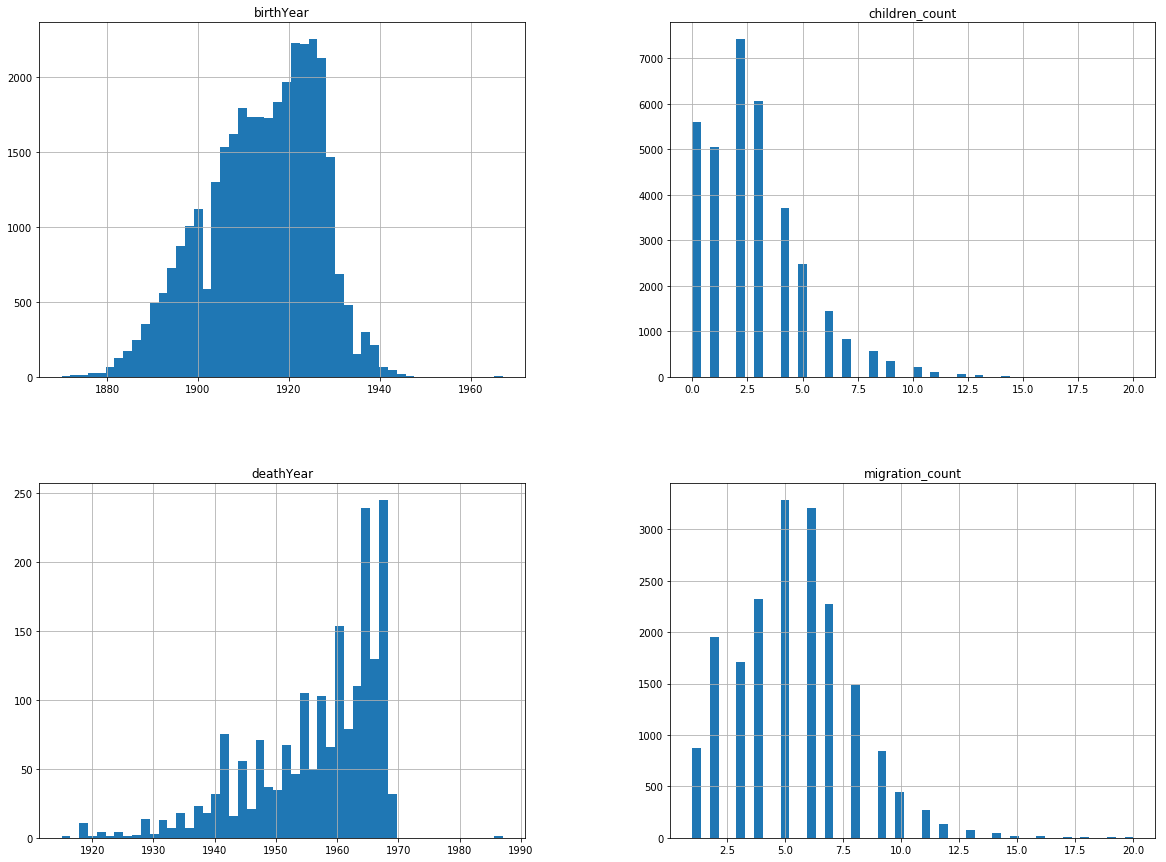

In [73]:
import matplotlib.pyplot as plt
karelia[['birthYear', 'children_count', 'deathYear', 'migration_count']].hist(bins=50, figsize=(20,15))
plt.show()

The distributions look like expected. Year of births and year of deaths are what can be expected from the data set since the matrikel books were created in 1970s so it does not contain any data after 70s. This means that small record in between 80s and 90s in deathYear plot is likely an error.

## Create test set

In [74]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(identifier.encode('utf-8')).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

# TODO: The index should be integer. Using kairaId which is string
# messes up most of the pandas stuff later.
train_set, test_set = split_train_test_by_id(karelia, 0.2, "kairaId")

test_set.head()

,kairaId,sex,primaryPerson,birthDay,birthMonth,birthYear,deathYear,ownHouse,returnedKarelia,previousMarriages,...,professionId,professionName,placeName,region,stemmedName,extractedName,latitude,longitude,children_count,migration_count
2,siirtokarjalaiset_1_912P,m,True,18.0,9.0,1918.0,NaN,True,false,false,...,13,työmies,Räisälä,karelia,räisäl,Räisälä,60.92175,29.76384,0,7.0
4,siirtokarjalaiset_1_1578P,m,True,18.0,4.0,1904.0,NaN,False,true,false,...,1,maanviljelijä,Räisälä,karelia,räisäl,Räisälä,60.92175,29.76384,0,2.0
7,siirtokarjalaiset_1_925P,f,True,4.0,2.0,1905.0,NaN,True,unknown,false,...,243,konttoriapulainen,Antrea,karelia,antr,Antrea,60.93333,29.16667,0,3.0
8,siirtokarjalaiset_1_926P,f,True,30.0,6.0,1902.0,NaN,False,true,false,...,2,emäntä,Räisätä,NaN,räisä,Räisätä,NaN,NaN,0,4.0
9,siirtokarjalaiset_1_926S_1,m,False,15.0,4.0,1900.0,NaN,NaN,unknown,unknown,...,1,maanviljelijä,Räisälä,karelia,räisäl,Räisälä,60.92175,29.76384,0,NaN


We should create a stratified test set based on *sex* of the person to get about same amount of men and women:

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

# TODO: Figure out how to properly convert sex labels to numbers
# and then do stratified shuffling based on them

#encoder = LabelEncoder()
#sex_cat = karelia['sex']
#print(karelia.head())
#sex_cat = pd.Categorical(sex_cat)
#karelia['sex'] = encoder.fit_transform(sex_cat.codes)

#pd.DataFrame(karelia).head()

#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#for train_index, test_index in split.split(karelia, karelia_cat_encoded['sex']):
#    strat_train_set = karelia.loc[train_index]
#    strat_test_set = karelia.loc[test_index]

## Data visualizations

In [76]:
karelia = train_set.copy() # Leave the test set out!

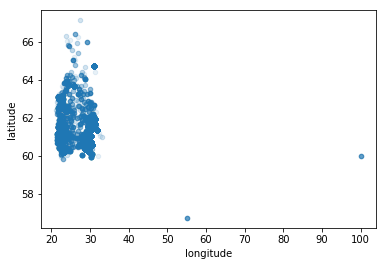

In [77]:
%matplotlib inline
karelia.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Looks like there is couple outliers in the dataset when it comes to birth locations. Lets filter them out to get a more sensible plot:

In [79]:
print(karelia.dtypes)

karelia = karelia.clip(None, upper=50.0, axis='longitude')


%matplotlib inline
karelia.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

kairaId               object
sex                   object
primaryPerson           bool
birthDay             float64
birthMonth           float64
birthYear            float64
deathYear            float64
ownHouse              object
returnedKarelia       object
previousMarriages     object
pageNumber            object
sourceTextId          object
professionId           int64
professionName        object
placeName             object
region                object
stemmedName           object
extractedName         object
latitude             float64
longitude            float64
children_count         int64
migration_count      float64
dtype: object


TypeError: unorderable types: str() >= float()